In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


GPU is available and being used for training.
Found 4000 images belonging to 10 classes.
Found 1000 files belonging to 10 classes.
Epoch 1/50
125/125 [==============================] - 154s 942ms/step - loss: 2.6427 - accuracy: 0.2362 - val_loss: 2.1159 - val_accuracy: 0.2360
Epoch 2/50
125/125 [==============================] - 109s 875ms/step - loss: 1.6758 - accuracy: 0.4405 - val_loss: 1.4158 - val_accuracy: 0.6070
Epoch 3/50
125/125 [==============================] - 115s 919ms/step - loss: 1.1749 - accuracy: 0.5870 - val_loss: 0.9896 - val_accuracy: 0.7090
Epoch 4/50
125/125 [==============================] - 114s 908ms/step - loss: 0.9213 - accuracy: 0.6628 - val_loss: 0.7023 - val_accuracy: 0.7720
Epoch 5/50
125/125 [==============================] - 110s 877ms/step - loss: 0.7196 - accuracy: 0.7452 - val_loss: 0.5296 - val_accuracy: 0.8140
Epoch 6/50
125/125 [==============================] - 111s 885ms/step - loss: 0.6159 - accuracy: 0.7797 - val_loss: 0.4334 - val_accuracy: 

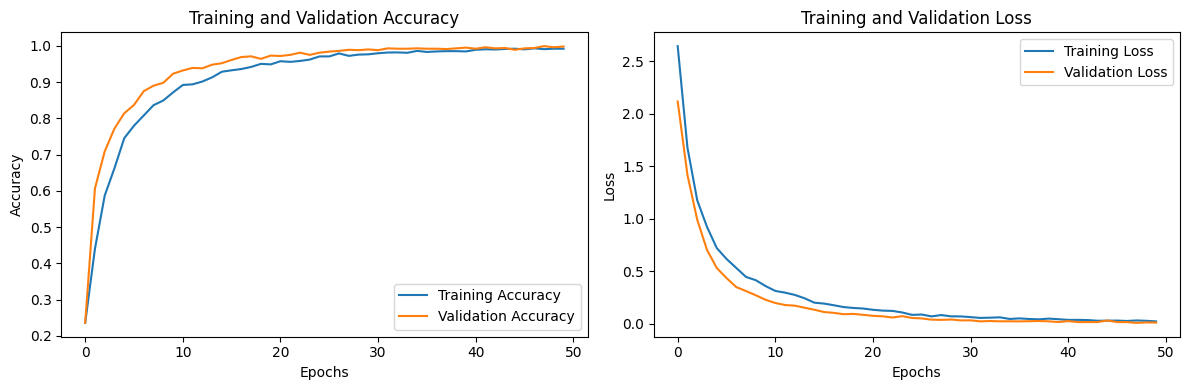

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Define your dataset directories
train_data_dir = '/content/drive/MyDrive/datasets/trainset'
val_data_dir = '/content/drive/MyDrive/datasets/testset'

# Image dimensions
img_height, img_width = 224, 224
batch_size = 32

# Check if GPU is available and being used
if tf.config.list_physical_devices('GPU'):
    print("GPU is available and being used for training.")
else:
    print("GPU is not available. Training on CPU.")

# Load the dataset with data augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_ds = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

num_classes = len(train_ds.class_indices)

# Define the model
pretrained_model = Xception(
    include_top=False,
    input_shape=(img_height, img_width, 3),
    pooling='avg',
    weights='imagenet'
)

model = Sequential([
    pretrained_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),  # Batch Normalization layer
    layers.Dropout(0.5),  # Dropout regularization
    layers.Dense(num_classes, activation='softmax')  # Output layer with 'num_classes' units
])

# Unfreeze some layers for fine-tuning
for layer in pretrained_model.layers[-10:]:
    layer.trainable = True

# Compile the model with a different learning rate
optimizer = Adam(learning_rate=0.00001)  # Changed learning rate
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 50  # Train for more epochs

# ModelCheckpoint callback to save the best model during training
checkpoint_path = '/content/drive/MyDrive/mosquito_model3'  # Change the path as needed
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             save_weights_only=False,
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[checkpoint]  # Include the ModelCheckpoint callback
)

# Get the model name
model_name = checkpoint_path.split('/')[-1]

# Print the model name along with its accuracy
print(f"Model {model_name} saved with Validation Accuracy: {max(history.history['val_accuracy']):.4f}")

# Plotting accuracy and loss
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
print(train_ds.class_indices)


{'Aedes Aegypti': 0, 'Aedes Albopictus': 1, 'Anopheles Albimanus': 2, 'Anopheles Arabiensis': 3, 'Anopheles Atroparvus': 4, 'Anopheles Coluzzi': 5, 'Anopheles Farauti': 6, 'Anopheles Freeborni': 7, 'Anopheles Stephensi': 8, 'Culex Quinquefasciatus': 9}


1/1 [==============================] - 1s 744ms/step
Confusion Matrix:
[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.98 0.   0.   0.   0.   0.   0.   0.   0.02]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]]


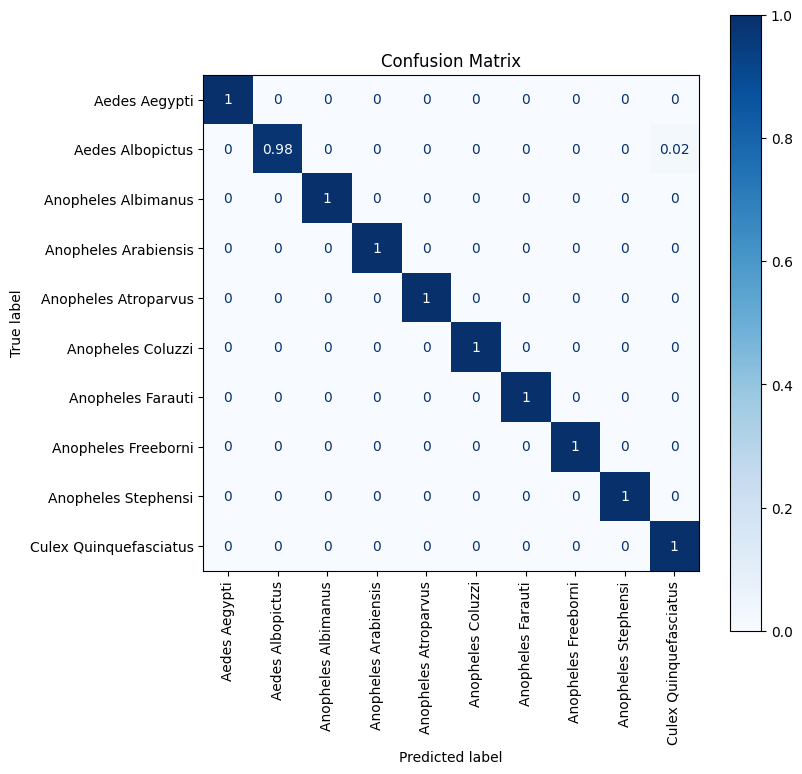

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define class names manually
class_names = ['Aedes Aegypti', 'Aedes Albopictus','Anopheles Albimanus','Anopheles Arabiensis','Anopheles Atroparvus','Anopheles Coluzzi','Anopheles Farauti','Anopheles Freeborni','Anopheles Stephensi', 'Culex Quinquefasciatus']

# Get the true labels and predictions for the validation set
val_true_labels = []
val_predictions = []

for images, labels in val_ds:
    val_true_labels.extend(labels.numpy())
    predictions = model.predict(images)
    val_predictions.extend(np.argmax(predictions, axis=1))

# Create the confusion matrix
cm = confusion_matrix(val_true_labels, val_predictions, normalize='true')

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()


Checking the models on the test set for all the 10 classes of mosquito.

Saving Aedes Aegypti_73.jpg to Aedes Aegypti_73.jpg
1/1 [==============================] - 4s 4s/step


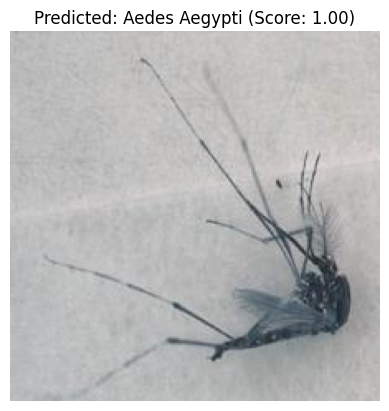

In [ ]:
from google.colab import drive
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
# Define the path to the saved model files in Google Drive
model_path = '/content/drive/MyDrive/mosquito_model3(Xception)'

# Load the model
model = tf.keras.models.load_model(model_path)

# Define the image dimensions
img_height, img_width = 224, 224  # Adjust these dimensions based on your model requirements

# Define the class names
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus', 'Anopheles Arabiensis', 'Anopheles Atroparvus', 'Anopheles Coluzzi', 'Anopheles Farauti', 'Anopheles Freeborni', 'Anopheles Stephensi', 'Culex Quinquefasciatus']

# Define the prediction function
def predict_image_class(image):
    resized_image = cv2.resize(image, (img_height, img_width))
    img_array = np.expand_dims(resized_image, axis=0)
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions)
    predicted_class_name = class_names[class_index]
    score = np.max(predictions)  # Get the maximum score as the prediction confidence
    return class_index, predicted_class_name, score

# Handle image upload
uploaded = files.upload()
for fn in uploaded.keys():
    img = Image.open(fn)
    img = np.array(img)
    prediction_index, prediction_name, prediction_score = predict_image_class(img)

    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted: {prediction_name} (Score: {prediction_score:.2f})')
    plt.show()


Saving 42.jpg to 42.jpg
1/1 [==============================] - 1s 719ms/step


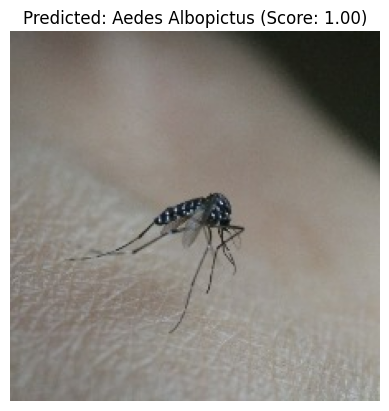

In [ ]:
from google.colab import drive
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
# Define the path to the saved model files in Google Drive
model_path = '/content/drive/MyDrive/mosquito_model3(Xception)'

# Load the model
model = tf.keras.models.load_model(model_path)

# Define the image dimensions
img_height, img_width = 224, 224  # Adjust these dimensions based on your model requirements

# Define the class names
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus', 'Anopheles Arabiensis', 'Anopheles Atroparvus', 'Anopheles Coluzzi', 'Anopheles Farauti', 'Anopheles Freeborni', 'Anopheles Stephensi', 'Culex Quinquefasciatus']

# Define the prediction function
def predict_image_class(image):
    resized_image = cv2.resize(image, (img_height, img_width))
    img_array = np.expand_dims(resized_image, axis=0)
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions)
    predicted_class_name = class_names[class_index]
    score = np.max(predictions)  # Get the maximum score as the prediction confidence
    return class_index, predicted_class_name, score

# Handle image upload
uploaded = files.upload()
for fn in uploaded.keys():
    img = Image.open(fn)
    img = np.array(img)
    prediction_index, prediction_name, prediction_score = predict_image_class(img)

    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted: {prediction_name} (Score: {prediction_score:.2f})')
    plt.show()


Saving Anopheles Albimanus_augmented_25.jpg to Anopheles Albimanus_augmented_25.jpg
1/1 [==============================] - 1s 818ms/step


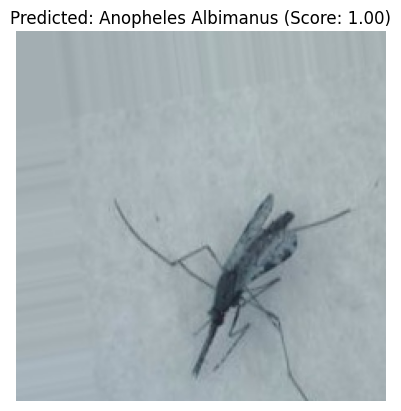

In [ ]:
from google.colab import drive
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
# Define the path to the saved model files in Google Drive
model_path = '/content/drive/MyDrive/mosquito_model3(Xception)'

# Load the model
model = tf.keras.models.load_model(model_path)

# Define the image dimensions
img_height, img_width = 224, 224  # Adjust these dimensions based on your model requirements

# Define the class names
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus', 'Anopheles Arabiensis', 'Anopheles Atroparvus', 'Anopheles Coluzzi', 'Anopheles Farauti', 'Anopheles Freeborni', 'Anopheles Stephensi', 'Culex Quinquefasciatus']

# Define the prediction function
def predict_image_class(image):
    resized_image = cv2.resize(image, (img_height, img_width))
    img_array = np.expand_dims(resized_image, axis=0)
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions)
    predicted_class_name = class_names[class_index]
    score = np.max(predictions)  # Get the maximum score as the prediction confidence
    return class_index, predicted_class_name, score

# Handle image upload
uploaded = files.upload()
for fn in uploaded.keys():
    img = Image.open(fn)
    img = np.array(img)
    prediction_index, prediction_name, prediction_score = predict_image_class(img)

    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted: {prediction_name} (Score: {prediction_score:.2f})')
    plt.show()


Saving Anopheles Arabiensis_augmented_77.jpg to Anopheles Arabiensis_augmented_77.jpg
1/1 [==============================] - 1s 724ms/step


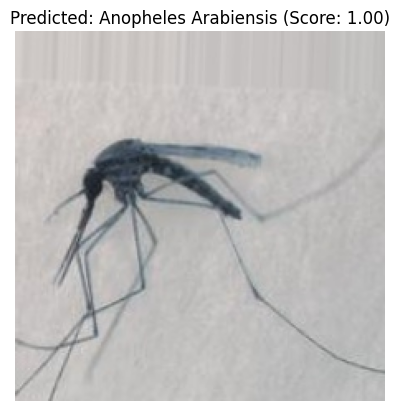

In [ ]:
from google.colab import drive
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
# Define the path to the saved model files in Google Drive
model_path = '/content/drive/MyDrive/mosquito_model3(Xception)'

# Load the model
model = tf.keras.models.load_model(model_path)

# Define the image dimensions
img_height, img_width = 224, 224  # Adjust these dimensions based on your model requirements

# Define the class names
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus', 'Anopheles Arabiensis', 'Anopheles Atroparvus', 'Anopheles Coluzzi', 'Anopheles Farauti', 'Anopheles Freeborni', 'Anopheles Stephensi', 'Culex Quinquefasciatus']

# Define the prediction function
def predict_image_class(image):
    resized_image = cv2.resize(image, (img_height, img_width))
    img_array = np.expand_dims(resized_image, axis=0)
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions)
    predicted_class_name = class_names[class_index]
    score = np.max(predictions)  # Get the maximum score as the prediction confidence
    return class_index, predicted_class_name, score

# Handle image upload
uploaded = files.upload()
for fn in uploaded.keys():
    img = Image.open(fn)
    img = np.array(img)
    prediction_index, prediction_name, prediction_score = predict_image_class(img)

    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted: {prediction_name} (Score: {prediction_score:.2f})')
    plt.show()


Saving Anopheles Atroparvus_augmented_36.jpg to Anopheles Atroparvus_augmented_36.jpg


1/1 [==============================] - 1s 713ms/step


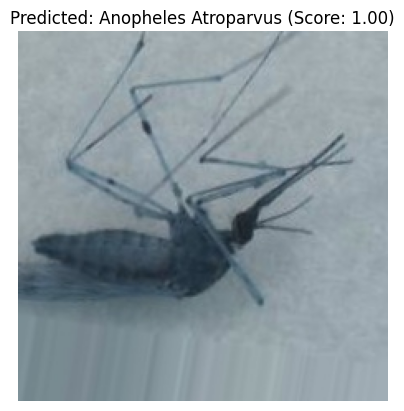

In [ ]:
from google.colab import drive
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
# Define the path to the saved model files in Google Drive
model_path = '/content/drive/MyDrive/mosquito_model3(Xception)'

# Load the model
model = tf.keras.models.load_model(model_path)

# Define the image dimensions
img_height, img_width = 224, 224  # Adjust these dimensions based on your model requirements

# Define the class names
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus', 'Anopheles Arabiensis', 'Anopheles Atroparvus', 'Anopheles Coluzzi', 'Anopheles Farauti', 'Anopheles Freeborni', 'Anopheles Stephensi', 'Culex Quinquefasciatus']

# Define the prediction function
def predict_image_class(image):
    resized_image = cv2.resize(image, (img_height, img_width))
    img_array = np.expand_dims(resized_image, axis=0)
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions)
    predicted_class_name = class_names[class_index]
    score = np.max(predictions)  # Get the maximum score as the prediction confidence
    return class_index, predicted_class_name, score

# Handle image upload
uploaded = files.upload()
for fn in uploaded.keys():
    img = Image.open(fn)
    img = np.array(img)
    prediction_index, prediction_name, prediction_score = predict_image_class(img)

    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted: {prediction_name} (Score: {prediction_score:.2f})')
    plt.show()


Saving Anopheles Coluzzi_augmented_45.jpg to Anopheles Coluzzi_augmented_45.jpg


1/1 [==============================] - 1s 754ms/step


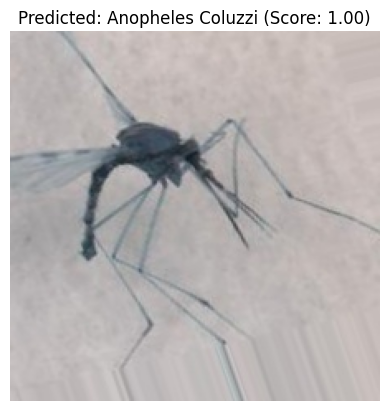

In [ ]:
from google.colab import drive
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
# Define the path to the saved model files in Google Drive
model_path = '/content/drive/MyDrive/mosquito_model3(Xception)'

# Load the model
model = tf.keras.models.load_model(model_path)

# Define the image dimensions
img_height, img_width = 224, 224  # Adjust these dimensions based on your model requirements

# Define the class names
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus', 'Anopheles Arabiensis', 'Anopheles Atroparvus', 'Anopheles Coluzzi', 'Anopheles Farauti', 'Anopheles Freeborni', 'Anopheles Stephensi', 'Culex Quinquefasciatus']

# Define the prediction function
def predict_image_class(image):
    resized_image = cv2.resize(image, (img_height, img_width))
    img_array = np.expand_dims(resized_image, axis=0)
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions)
    predicted_class_name = class_names[class_index]
    score = np.max(predictions)  # Get the maximum score as the prediction confidence
    return class_index, predicted_class_name, score

# Handle image upload
uploaded = files.upload()
for fn in uploaded.keys():
    img = Image.open(fn)
    img = np.array(img)
    prediction_index, prediction_name, prediction_score = predict_image_class(img)

    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted: {prediction_name} (Score: {prediction_score:.2f})')
    plt.show()


Saving Anopheles Farauti_augmented_16.jpg to Anopheles Farauti_augmented_16.jpg
1/1 [==============================] - 1s 755ms/step


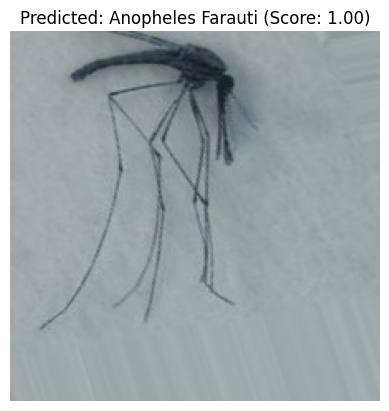

In [ ]:
from google.colab import drive
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
# Define the path to the saved model files in Google Drive
model_path = '/content/drive/MyDrive/mosquito_model3(Xception)'

# Load the model
model = tf.keras.models.load_model(model_path)

# Define the image dimensions
img_height, img_width = 224, 224  # Adjust these dimensions based on your model requirements

# Define the class names
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus', 'Anopheles Arabiensis', 'Anopheles Atroparvus', 'Anopheles Coluzzi', 'Anopheles Farauti', 'Anopheles Freeborni', 'Anopheles Stephensi', 'Culex Quinquefasciatus']

# Define the prediction function
def predict_image_class(image):
    resized_image = cv2.resize(image, (img_height, img_width))
    img_array = np.expand_dims(resized_image, axis=0)
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions)
    predicted_class_name = class_names[class_index]
    score = np.max(predictions)  # Get the maximum score as the prediction confidence
    return class_index, predicted_class_name, score

# Handle image upload
uploaded = files.upload()
for fn in uploaded.keys():
    img = Image.open(fn)
    img = np.array(img)
    prediction_index, prediction_name, prediction_score = predict_image_class(img)

    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted: {prediction_name} (Score: {prediction_score:.2f})')
    plt.show()


Saving Anopheles Freeborni_augmented_15.jpg to Anopheles Freeborni_augmented_15.jpg
1/1 [==============================] - 1s 744ms/step


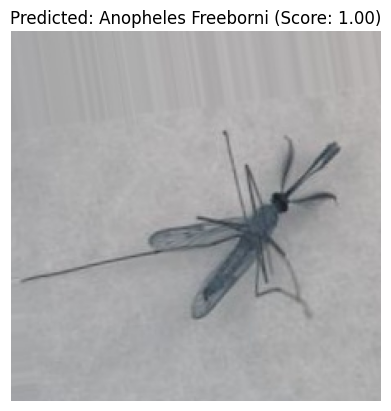

In [ ]:
from google.colab import drive
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
# Define the path to the saved model files in Google Drive
model_path = '/content/drive/MyDrive/mosquito_model3(Xception)'

# Load the model
model = tf.keras.models.load_model(model_path)

# Define the image dimensions
img_height, img_width = 224, 224  # Adjust these dimensions based on your model requirements

# Define the class names
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus', 'Anopheles Arabiensis', 'Anopheles Atroparvus', 'Anopheles Coluzzi', 'Anopheles Farauti', 'Anopheles Freeborni', 'Anopheles Stephensi', 'Culex Quinquefasciatus']

# Define the prediction function
def predict_image_class(image):
    resized_image = cv2.resize(image, (img_height, img_width))
    img_array = np.expand_dims(resized_image, axis=0)
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions)
    predicted_class_name = class_names[class_index]
    score = np.max(predictions)  # Get the maximum score as the prediction confidence
    return class_index, predicted_class_name, score

# Handle image upload
uploaded = files.upload()
for fn in uploaded.keys():
    img = Image.open(fn)
    img = np.array(img)
    prediction_index, prediction_name, prediction_score = predict_image_class(img)

    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted: {prediction_name} (Score: {prediction_score:.2f})')
    plt.show()


Saving Anopheles Stephensi_augmented_100.jpg to Anopheles Stephensi_augmented_100.jpg
1/1 [==============================] - 2s 2s/step


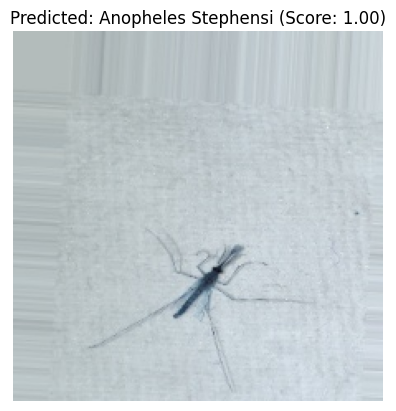

In [ ]:
from google.colab import drive
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
# Define the path to the saved model files in Google Drive
model_path = '/content/drive/MyDrive/mosquito_model3(Xception)'

# Load the model
model = tf.keras.models.load_model(model_path)

# Define the image dimensions
img_height, img_width = 224, 224  # Adjust these dimensions based on your model requirements

# Define the class names
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus', 'Anopheles Arabiensis', 'Anopheles Atroparvus', 'Anopheles Coluzzi', 'Anopheles Farauti', 'Anopheles Freeborni', 'Anopheles Stephensi', 'Culex Quinquefasciatus']

# Define the prediction function
def predict_image_class(image):
    resized_image = cv2.resize(image, (img_height, img_width))
    img_array = np.expand_dims(resized_image, axis=0)
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions)
    predicted_class_name = class_names[class_index]
    score = np.max(predictions)  # Get the maximum score as the prediction confidence
    return class_index, predicted_class_name, score

# Handle image upload
uploaded = files.upload()
for fn in uploaded.keys():
    img = Image.open(fn)
    img = np.array(img)
    prediction_index, prediction_name, prediction_score = predict_image_class(img)

    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted: {prediction_name} (Score: {prediction_score:.2f})')
    plt.show()


Saving 29.jpg to 29.jpg
1/1 [==============================] - 1s 744ms/step


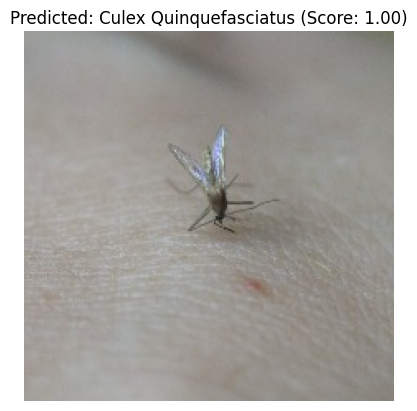

In [ ]:
from google.colab import drive
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
# Define the path to the saved model files in Google Drive
model_path = '/content/drive/MyDrive/mosquito_model3(Xception)'

# Load the model
model = tf.keras.models.load_model(model_path)

# Define the image dimensions
img_height, img_width = 224, 224  # Adjust these dimensions based on your model requirements

# Define the class names
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus', 'Anopheles Arabiensis', 'Anopheles Atroparvus', 'Anopheles Coluzzi', 'Anopheles Farauti', 'Anopheles Freeborni', 'Anopheles Stephensi', 'Culex Quinquefasciatus']

# Define the prediction function
def predict_image_class(image):
    resized_image = cv2.resize(image, (img_height, img_width))
    img_array = np.expand_dims(resized_image, axis=0)
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions)
    predicted_class_name = class_names[class_index]
    score = np.max(predictions)  # Get the maximum score as the prediction confidence
    return class_index, predicted_class_name, score

# Handle image upload
uploaded = files.upload()
for fn in uploaded.keys():
    img = Image.open(fn)
    img = np.array(img)
    prediction_index, prediction_name, prediction_score = predict_image_class(img)

    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted: {prediction_name} (Score: {prediction_score:.2f})')
    plt.show()


Openmax

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scipy.stats import weibull_min
from sklearn.metrics import euclidean_distances
import pickle

# Check if GPU is available
if tf.test.gpu_device_name():
    print('Default GPU Device:', tf.test.gpu_device_name())
else:
    print("Please install GPU version of TF")

# Load your fine-tuned model
model_path = '/content/drive/MyDrive/mosquito_model3(Xception)'
model = load_model(model_path)

# Assuming the model outputs softmax probabilities, let's modify it to output logits
# Typically, the logits are the inputs to the final softmax activation layer
logits_layer = model.layers[-2].output  # This assumes the second last layer is the logits layer
logits_model = Model(inputs=model.input, outputs=logits_layer)

# Load dataset
train_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/datasets/trainset',
    target_size=(224, 224),
    batch_size=1,  # Processing one image at a time for MAV calculation
    class_mode='sparse',
    shuffle=False  # To maintain label order
)

# Define the number of classes based on the number of unique labels in the training dataset
num_classes = len(np.unique(train_generator.classes))

# Extract logits and labels from training data
logits = []
labels = []
for images, label in train_generator:
    log = logits_model.predict(images)
    logits.append(log.flatten())
    labels.append(label[0])
    if len(labels) >= len(train_generator.labels):
        break

logits = np.array(logits)
labels = np.array(labels)

# Calculate MAVs and distances for each class
mavs = []
distances = []
for i in range(num_classes):
    class_indices = np.where(labels == i)[0]
    class_logits = logits[class_indices]
    mav = np.mean(class_logits, axis=0)
    mavs.append(mav)
    dist = euclidean_distances(class_logits, [mav])
    distances.append(dist.flatten())

# Fit Weibull distribution for each class
weibull_models = []
for dist in distances:
    params = weibull_min.fit(dist, floc=0)
    weibull_models.append(params)

# Save the MAVs and Weibull models to a pickle file
with open('xception_mavs_and_weibull.pkl', 'wb') as f:
    pickle.dump((mavs, weibull_models), f)

# Output to show that MAVs and Weibull models are ready
print("MAVs and Weibull models are ready for prediction.")


Default GPU Device: /device:GPU:0
Found 4000 images belonging to 10 classes.
1/1 [==============================] - 0s 27ms/step
MAVs and Weibull models are ready for prediction.


openmax using threshold 0.5

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from scipy.stats import weibull_min
from sklearn.metrics import euclidean_distances, accuracy_score, classification_report
import pickle
from tensorflow.keras.models import Model, load_model

# Load the fine-tuned model and OpenMax parameters
model_path = '/content/drive/MyDrive/mosquito_model3(Xception)'
mavs_path = '/content/xception_mavs_and_weibull.pkl'
model = load_model(model_path)
with open(mavs_path, 'rb') as f:
    mavs, weibull_models = pickle.load(f)

logits_model = Model(inputs=model.input, outputs=model.layers[-2].output)  # Adjust based on your model architecture

# Define class names including 'Unknown'
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus', 'Anopheles Arabiensis',
               'Anopheles Atroparvus', 'Anopheles Coluzzi', 'Anopheles Farauti', 'Anopheles Freeborni',
               'Anopheles Stephensi', 'Culex Quinquefasciatus', 'Unknown']

# Load test data
test_dir = '/content/drive/MyDrive/datasets/openmaxTestset'  # Update with your actual test set path
datagen = ImageDataGenerator()
test_gen = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,  # Evaluate one image at a time
    class_mode='sparse',  # 'sparse' if labels are integers
    shuffle=False
)

# Classify images using OpenMax and collect predictions
predictions = []
true_labels = test_gen.classes

for i in range(len(test_gen)):
    x, _ = test_gen.next()
    img_array = np.expand_dims(x[0], axis=0)  # Prepare image
    logits = logits_model.predict(img_array).flatten()

    recalibrated_scores = np.zeros(len(mavs))  # Number of known classes
    threshold = 0.5  # Threshold to decide if it's unknown
    for j in range(len(mavs)):
        dist = euclidean_distances([logits], [mavs[j]])[0][0]
        shape, loc, scale = weibull_models[j]
        weibull_cdf = weibull_min.cdf(dist, shape, loc, scale)
        recalibrated_scores[j] = 1 - weibull_cdf

    if max(recalibrated_scores) < threshold:
        predictions.append(10)  # Index for 'Unknown'
    else:
        predictions.append(np.argmax(recalibrated_scores))

# Evaluate accuracy and generate classification report
accuracy = accuracy_score(true_labels, predictions)
report = classification_report(true_labels, predictions, target_names=class_names)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Found 1100 images belonging to 11 classes.
1/1 [==============================] - 0s 24ms/step
Accuracy: 0.600909090909091
Classification Report:
                         precision    recall  f1-score   support

         Aedes Aegypti       1.00      0.54      0.70       100
      Aedes Albopictus       1.00      0.56      0.72       100
   Anopheles Albimanus       1.00      0.54      0.70       100
  Anopheles Arabiensis       1.00      0.61      0.76       100
  Anopheles Atroparvus       1.00      0.61      0.76       100
     Anopheles Coluzzi       1.00      0.53      0.69       100
     Anopheles Farauti       1.00      0.55      0.71       100
   Anopheles Freeborni       1.00      0.47      0.64       100
   Anopheles Stephensi       1.00      0.56      0.72       100
Culex Quinquefasciatus       1.00      0.64      0.78       100
               Unknown       0.19      1.00      0.31       100

              accuracy                           0.60      1100
             macro 

openmax using threshold 0.4

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from scipy.stats import weibull_min
from sklearn.metrics import euclidean_distances, accuracy_score, classification_report
import pickle
from tensorflow.keras.models import Model, load_model

# Set memory growth before initializing physical devices
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Load the fine-tuned model and OpenMax parameters
model_path = '/content/drive/MyDrive/mosquito_model3(Xception)'
mavs_path = '/content/xception_mavs_and_weibull.pkl'
model = load_model(model_path)
with open(mavs_path, 'rb') as f:
    mavs, weibull_models = pickle.load(f)

logits_model = Model(inputs=model.input, outputs=model.layers[-2].output)  # Adjust based on your model architecture

# Define class names including 'Unknown'
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus', 'Anopheles Arabiensis',
               'Anopheles Atroparvus', 'Anopheles Coluzzi', 'Anopheles Farauti', 'Anopheles Freeborni',
               'Anopheles Stephensi', 'Culex Quinquefasciatus', 'Unknown']

# Load test data
test_dir = '/content/drive/MyDrive/datasets/openmaxTestset'  # Update with your actual test set path
datagen = ImageDataGenerator()
test_gen = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,  # Evaluate one image at a time
    class_mode='sparse',  # 'sparse' if labels are integers
    shuffle=False
)

# Classify images using OpenMax and collect predictions
predictions = []
true_labels = test_gen.classes

for i in range(len(test_gen)):
    x, _ = test_gen.next()
    img_array = np.expand_dims(x[0], axis=0)  # Prepare image
    logits = logits_model.predict(img_array).flatten()

    recalibrated_scores = np.zeros(len(mavs))  # Number of known classes
    threshold = 0.4  # Threshold to decide if it's unknown
    for j in range(len(mavs)):
        dist = euclidean_distances([logits], [mavs[j]])[0][0]
        shape, loc, scale = weibull_models[j]
        weibull_cdf = weibull_min.cdf(dist, shape, loc, scale)
        recalibrated_scores[j] = 1 - weibull_cdf

    if max(recalibrated_scores) < threshold:
        predictions.append(10)  # Index for 'Unknown'
    else:
        predictions.append(np.argmax(recalibrated_scores))

# Evaluate accuracy and generate classification report
accuracy = accuracy_score(true_labels, predictions)
report = classification_report(true_labels, predictions, target_names=class_names)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Physical devices cannot be modified after being initialized
Found 1100 images belonging to 11 classes.
1/1 [==============================] - 0s 24ms/step
Accuracy: 0.6845454545454546
Classification Report:
                         precision    recall  f1-score   support

         Aedes Aegypti       1.00      0.63      0.77       100
      Aedes Albopictus       1.00      0.72      0.84       100
   Anopheles Albimanus       1.00      0.61      0.76       100
  Anopheles Arabiensis       0.99      0.70      0.82       100
  Anopheles Atroparvus       1.00      0.67      0.80       100
     Anopheles Coluzzi       0.98      0.59      0.74       100
     Anopheles Farauti       1.00      0.66      0.80       100
   Anopheles Freeborni       1.00      0.54      0.70       100
   Anopheles Stephensi       1.00      0.68      0.81       100
Culex Quinquefasciatus       1.00      0.73      0.84       100
               Unknown       0.22      1.00      0.37       100

              accuracy

openmax using threshold 0.3

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from scipy.stats import weibull_min
from sklearn.metrics import euclidean_distances, accuracy_score, classification_report
import pickle
from tensorflow.keras.models import Model, load_model

# Set memory growth before initializing physical devices
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Load the fine-tuned model and OpenMax parameters
model_path = '/content/drive/MyDrive/mosquito_model3(Xception)'
mavs_path = '/content/xception_mavs_and_weibull.pkl'
model = load_model(model_path)
with open(mavs_path, 'rb') as f:
    mavs, weibull_models = pickle.load(f)

logits_model = Model(inputs=model.input, outputs=model.layers[-2].output)  # Adjust based on your model architecture

# Define class names including 'Unknown'
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus', 'Anopheles Arabiensis',
               'Anopheles Atroparvus', 'Anopheles Coluzzi', 'Anopheles Farauti', 'Anopheles Freeborni',
               'Anopheles Stephensi', 'Culex Quinquefasciatus', 'Unknown']

# Load test data
test_dir = '/content/drive/MyDrive/datasets/openmaxTestset'  # Update with your actual test set path
datagen = ImageDataGenerator()
test_gen = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,  # Evaluate one image at a time
    class_mode='sparse',  # 'sparse' if labels are integers
    shuffle=False
)

# Classify images using OpenMax and collect predictions
predictions = []
true_labels = test_gen.classes

for i in range(len(test_gen)):
    x, _ = test_gen.next()
    img_array = np.expand_dims(x[0], axis=0)  # Prepare image
    logits = logits_model.predict(img_array).flatten()

    recalibrated_scores = np.zeros(len(mavs))  # Number of known classes
    threshold = 0.3  # Threshold to decide if it's unknown
    for j in range(len(mavs)):
        dist = euclidean_distances([logits], [mavs[j]])[0][0]
        shape, loc, scale = weibull_models[j]
        weibull_cdf = weibull_min.cdf(dist, shape, loc, scale)
        recalibrated_scores[j] = 1 - weibull_cdf

    if max(recalibrated_scores) < threshold:
        predictions.append(10)  # Index for 'Unknown'
    else:
        predictions.append(np.argmax(recalibrated_scores))

# Evaluate accuracy and generate classification report
accuracy = accuracy_score(true_labels, predictions)
report = classification_report(true_labels, predictions, target_names=class_names)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Physical devices cannot be modified after being initialized
Found 1100 images belonging to 11 classes.
1/1 [==============================] - 0s 25ms/step
Accuracy: 0.7654545454545455
Classification Report:
                         precision    recall  f1-score   support

         Aedes Aegypti       1.00      0.70      0.82       100
      Aedes Albopictus       1.00      0.76      0.86       100
   Anopheles Albimanus       1.00      0.73      0.84       100
  Anopheles Arabiensis       0.99      0.82      0.90       100
  Anopheles Atroparvus       1.00      0.73      0.84       100
     Anopheles Coluzzi       0.98      0.63      0.77       100
     Anopheles Farauti       1.00      0.78      0.88       100
   Anopheles Freeborni       1.00      0.71      0.83       100
   Anopheles Stephensi       1.00      0.76      0.86       100
Culex Quinquefasciatus       1.00      0.80      0.89       100
               Unknown       0.28      1.00      0.44       100

              accuracy

openmax using threshold 0.2

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from scipy.stats import weibull_min
from sklearn.metrics import euclidean_distances, accuracy_score, classification_report
import pickle
from tensorflow.keras.models import Model, load_model

# Set memory growth before initializing physical devices
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Load the fine-tuned model and OpenMax parameters
model_path = '/content/drive/MyDrive/mosquito_model3(Xception)'
mavs_path = '/content/xception_mavs_and_weibull.pkl'
model = load_model(model_path)
with open(mavs_path, 'rb') as f:
    mavs, weibull_models = pickle.load(f)

logits_model = Model(inputs=model.input, outputs=model.layers[-2].output)  # Adjust based on your model architecture

# Define class names including 'Unknown'
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus', 'Anopheles Arabiensis',
               'Anopheles Atroparvus', 'Anopheles Coluzzi', 'Anopheles Farauti', 'Anopheles Freeborni',
               'Anopheles Stephensi', 'Culex Quinquefasciatus', 'Unknown']

# Load test data
test_dir = '/content/drive/MyDrive/datasets/openmaxTestset'  # Update with your actual test set path
datagen = ImageDataGenerator()
test_gen = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,  # Evaluate one image at a time
    class_mode='sparse',  # 'sparse' if labels are integers
    shuffle=False
)

# Classify images using OpenMax and collect predictions
predictions = []
true_labels = test_gen.classes

for i in range(len(test_gen)):
    x, _ = test_gen.next()
    img_array = np.expand_dims(x[0], axis=0)  # Prepare image
    logits = logits_model.predict(img_array).flatten()

    recalibrated_scores = np.zeros(len(mavs))  # Number of known classes
    threshold = 0.2  # Threshold to decide if it's unknown
    for j in range(len(mavs)):
        dist = euclidean_distances([logits], [mavs[j]])[0][0]
        shape, loc, scale = weibull_models[j]
        weibull_cdf = weibull_min.cdf(dist, shape, loc, scale)
        recalibrated_scores[j] = 1 - weibull_cdf

    if max(recalibrated_scores) < threshold:
        predictions.append(10)  # Index for 'Unknown'
    else:
        predictions.append(np.argmax(recalibrated_scores))

# Evaluate accuracy and generate classification report
accuracy = accuracy_score(true_labels, predictions)
report = classification_report(true_labels, predictions, target_names=class_names)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Physical devices cannot be modified after being initialized
Found 1100 images belonging to 11 classes.
1/1 [==============================] - 0s 24ms/step
Accuracy: 0.8372727272727273
Classification Report:
                         precision    recall  f1-score   support

         Aedes Aegypti       1.00      0.82      0.90       100
      Aedes Albopictus       1.00      0.84      0.91       100
   Anopheles Albimanus       1.00      0.81      0.90       100
  Anopheles Arabiensis       0.99      0.89      0.94       100
  Anopheles Atroparvus       1.00      0.80      0.89       100
     Anopheles Coluzzi       0.99      0.75      0.85       100
     Anopheles Farauti       1.00      0.84      0.91       100
   Anopheles Freeborni       1.00      0.77      0.87       100
   Anopheles Stephensi       1.00      0.81      0.90       100
Culex Quinquefasciatus       1.00      0.88      0.94       100
               Unknown       0.36      1.00      0.53       100

              accuracy

openmax using threshold 0.1

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from scipy.stats import weibull_min
from sklearn.metrics import euclidean_distances, accuracy_score, classification_report
import pickle
from tensorflow.keras.models import Model, load_model

# Set memory growth before initializing physical devices
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Load the fine-tuned model and OpenMax parameters
model_path = '/content/drive/MyDrive/mosquito_model3(Xception)'
mavs_path = '/content/xception_mavs_and_weibull.pkl'
model = load_model(model_path)
with open(mavs_path, 'rb') as f:
    mavs, weibull_models = pickle.load(f)

logits_model = Model(inputs=model.input, outputs=model.layers[-2].output)  # Adjust based on your model architecture

# Define class names including 'Unknown'
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus', 'Anopheles Arabiensis',
               'Anopheles Atroparvus', 'Anopheles Coluzzi', 'Anopheles Farauti', 'Anopheles Freeborni',
               'Anopheles Stephensi', 'Culex Quinquefasciatus', 'Unknown']

# Load test data
test_dir = '/content/drive/MyDrive/datasets/openmaxTestset'  # Update with your actual test set path
datagen = ImageDataGenerator()
test_gen = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,  # Evaluate one image at a time
    class_mode='sparse',  # 'sparse' if labels are integers
    shuffle=False
)

# Classify images using OpenMax and collect predictions
predictions = []
true_labels = test_gen.classes

for i in range(len(test_gen)):
    x, _ = test_gen.next()
    img_array = np.expand_dims(x[0], axis=0)  # Prepare image
    logits = logits_model.predict(img_array).flatten()

    recalibrated_scores = np.zeros(len(mavs))  # Number of known classes
    threshold = 0.1  # Threshold to decide if it's unknown
    for j in range(len(mavs)):
        dist = euclidean_distances([logits], [mavs[j]])[0][0]
        shape, loc, scale = weibull_models[j]
        weibull_cdf = weibull_min.cdf(dist, shape, loc, scale)
        recalibrated_scores[j] = 1 - weibull_cdf

    if max(recalibrated_scores) < threshold:
        predictions.append(10)  # Index for 'Unknown'
    else:
        predictions.append(np.argmax(recalibrated_scores))

# Evaluate accuracy and generate classification report
accuracy = accuracy_score(true_labels, predictions)
report = classification_report(true_labels, predictions, target_names=class_names)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Physical devices cannot be modified after being initialized
Found 1100 images belonging to 11 classes.
1/1 [==============================] - 0s 24ms/step
Accuracy: 0.8963636363636364
Classification Report:
                         precision    recall  f1-score   support

         Aedes Aegypti       1.00      0.91      0.95       100
      Aedes Albopictus       1.00      0.89      0.94       100
   Anopheles Albimanus       1.00      0.91      0.95       100
  Anopheles Arabiensis       0.98      0.93      0.95       100
  Anopheles Atroparvus       1.00      0.91      0.95       100
     Anopheles Coluzzi       0.99      0.85      0.91       100
     Anopheles Farauti       1.00      0.89      0.94       100
   Anopheles Freeborni       1.00      0.83      0.91       100
   Anopheles Stephensi       1.00      0.88      0.94       100
Culex Quinquefasciatus       0.93      0.92      0.92       100
               Unknown       0.47      0.94      0.63       100

              accuracy

wihtout openmax ROC and AUROC

Found 1100 images belonging to 11 classes.
1/1 [==============================] - 0s 25ms/step


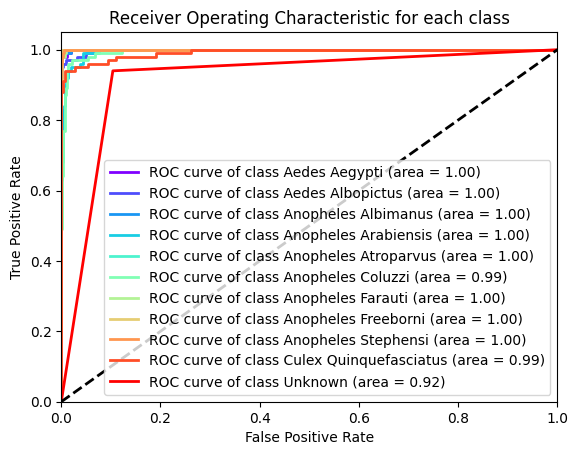

Overall AUROC: 0.9907354545454545


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming you've already loaded your model and OpenMax parameters

# Load test data as before
test_dir = '/content/drive/MyDrive/datasets/openmaxTestset'
datagen = ImageDataGenerator()
test_gen = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode='sparse',
    shuffle=False
)

# Prepare to collect all recalibrated scores for ROC analysis
all_scores = []
true_labels = test_gen.classes

# Process each test image
for i in range(len(test_gen)):
    x, _ = test_gen.next()
    img_array = np.expand_dims(x[0], axis=0)  # Prepare image
    logits = logits_model.predict(img_array).flatten()

    recalibrated_scores = np.zeros(len(mavs) + 1)  # Include an extra slot for 'Unknown'
    threshold = 0.1  # Threshold for deciding 'Unknown'
    for j in range(len(mavs)):
        dist = euclidean_distances([logits], [mavs[j]])[0][0]
        shape, loc, scale = weibull_models[j]
        weibull_cdf = weibull_min.cdf(dist, shape, loc, scale)
        recalibrated_scores[j] = 1 - weibull_cdf

    recalibrated_scores[-1] = max(recalibrated_scores) < threshold  # Score for 'Unknown'
    all_scores.append(recalibrated_scores)

all_scores = np.array(all_scores)

# Binarize the labels
true_labels_bin = label_binarize(true_labels, classes=list(range(len(class_names))))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], all_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(class_names))))
for i, color in zip(range(len(class_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

# Calculate overall AUROC
overall_roc_auc = roc_auc_score(true_labels_bin, all_scores, multi_class='ovr')
print("Overall AUROC:", overall_roc_auc)


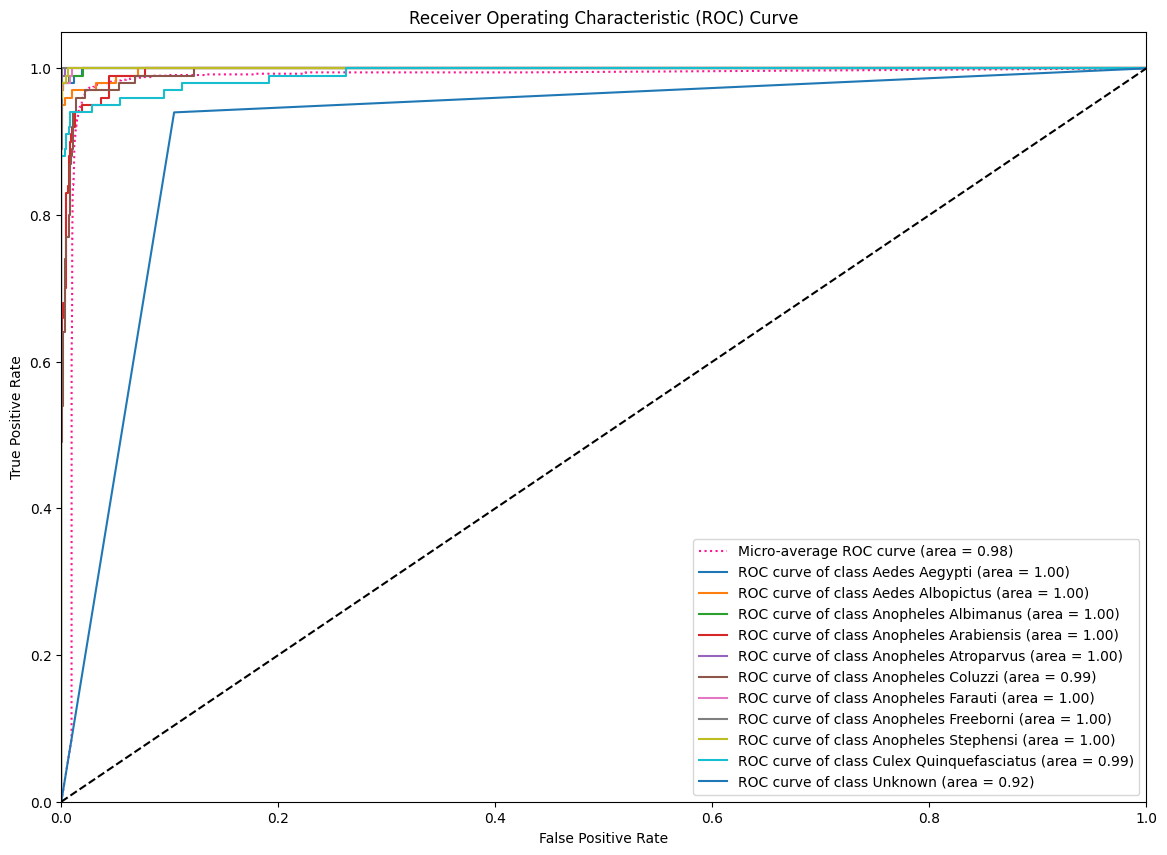

AUROC per class:
Aedes Aegypti: 1.00
Aedes Albopictus: 1.00
Anopheles Albimanus: 1.00
Anopheles Arabiensis: 1.00
Anopheles Atroparvus: 1.00
Anopheles Coluzzi: 0.99
Anopheles Farauti: 1.00
Anopheles Freeborni: 1.00
Anopheles Stephensi: 1.00
Culex Quinquefasciatus: 0.99
Unknown: 0.92
Micro-average AUROC: 0.9849081818181818


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

# Assuming all_scores is an array of scores for each class including 'Unknown' and true_labels are the actual class indices
# Binarize the labels for multiclass ROC analysis
true_labels_bin = label_binarize(true_labels, classes=list(range(len(class_names))))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], all_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(true_labels_bin.ravel(), all_scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(14, 10))
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':')

for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i],
             label='ROC curve of class {0} (area = {1:0.2f})'.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print AUROC for each class
print("AUROC per class:")
for i, name in enumerate(class_names):
    print("{0}: {1:0.2f}".format(name, roc_auc[i]))
print("Micro-average AUROC:", roc_auc["micro"])


Found 1100 images belonging to 11 classes.
1/1 [==============================] - 0s 24ms/step


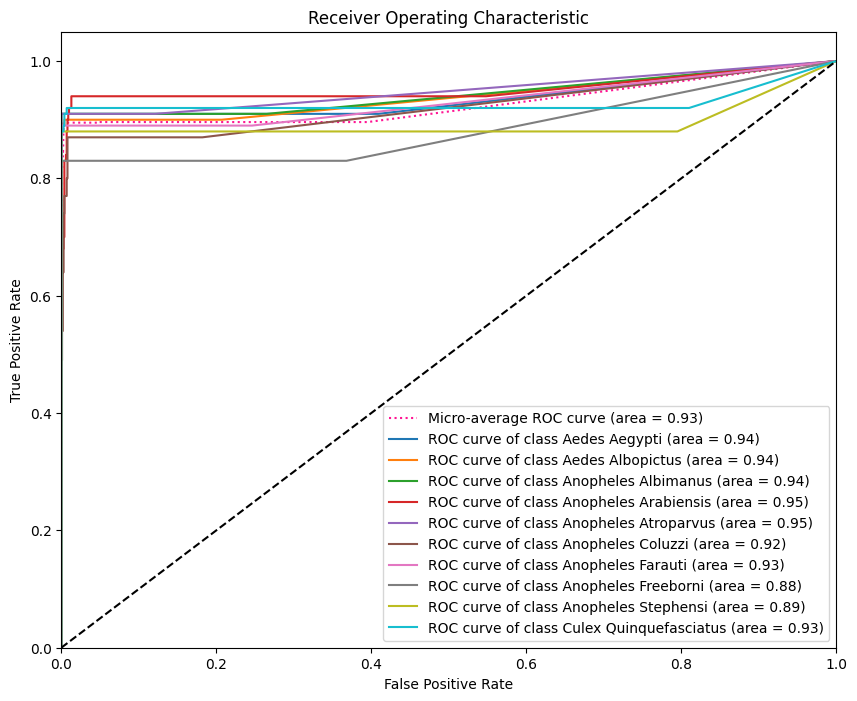

AUROC per class:
Aedes Aegypti: 0.94
Aedes Albopictus: 0.94
Anopheles Albimanus: 0.94
Anopheles Arabiensis: 0.95
Anopheles Atroparvus: 0.95
Anopheles Coluzzi: 0.92
Anopheles Farauti: 0.93
Anopheles Freeborni: 0.88
Anopheles Stephensi: 0.89
Culex Quinquefasciatus: 0.93
Micro-average AUROC: 0.9270734


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import euclidean_distances
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from scipy.stats import weibull_min
import pickle

# GPU configuration
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Load the model and OpenMax parameters
model_path = '/content/drive/MyDrive/mosquito_model3(Xception)'
mavs_path = '/content/drive/MyDrive/mosquito_model3(Xception)/xception_mavs_and_weibull.pkl'
model = load_model(model_path)
logits_model = Model(inputs=model.input, outputs=model.layers[-2].output)

with open(mavs_path, 'rb') as f:
    mavs, weibull_models = pickle.load(f)

class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus', 'Anopheles Arabiensis',
               'Anopheles Atroparvus', 'Anopheles Coluzzi', 'Anopheles Farauti', 'Anopheles Freeborni',
               'Anopheles Stephensi', 'Culex Quinquefasciatus']
num_classes = len(class_names)

# Image data generator
datagen = ImageDataGenerator()
test_gen = datagen.flow_from_directory(
    '/content/drive/MyDrive/datasets/openmaxTestset',
    target_size=(224, 224),
    batch_size=1,
    class_mode='sparse',
    shuffle=False
)

# Collect scores and true labels
scores = []
true_labels = []
threshold = 0.1  # Threshold to determine "unknown"

for i in range(len(test_gen)):
    x, y = test_gen.next()
    logits = logits_model.predict(x)
    recalibrated_scores = np.zeros(num_classes)
    for j in range(num_classes):
        dist = euclidean_distances([logits.flatten()], [mavs[j]])[0][0]
        shape, loc, scale = weibull_models[j]
        weibull_cdf = weibull_min.cdf(dist, shape, loc, scale)
        recalibrated_scores[j] = 1 - weibull_cdf

    # Apply threshold to consider an "unknown" classification
    if np.max(recalibrated_scores) < threshold:
        scores.append(np.zeros(num_classes))  # Zero scores if classified as unknown
    else:
        scores.append(recalibrated_scores)

    true_labels.append(int(y[0]))

# Binarize the labels
true_labels = label_binarize(true_labels, classes=range(num_classes))
scores = np.array(scores)

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(true_labels.ravel(), scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':')
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print AUROC scores
print("AUROC per class:")
for i, name in enumerate(class_names):
    print(f"{name}: {roc_auc[i]:.2f}")
print("Micro-average AUROC:", roc_auc["micro"])


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import euclidean_distances, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from scipy.stats import weibull_min
import pickle

# GPU configuration
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Load the model and OpenMax parameters
model_path = '/content/drive/MyDrive/mosquito_model3(Xception)'
mavs_path = '/content/drive/MyDrive/mosquito_model3(Xception)/xception_mavs_and_weibull.pkl'
model = load_model(model_path)
logits_model = Model(inputs=model.input, outputs=model.layers[-2].output)

with open(mavs_path, 'rb') as f:
    mavs, weibull_models = pickle.load(f)

class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus', 'Anopheles Arabiensis',
               'Anopheles Atroparvus', 'Anopheles Coluzzi', 'Anopheles Farauti', 'Anopheles Freeborni',
               'Anopheles Stephensi', 'Culex Quinquefasciatus', 'Unknown']
num_classes = len(class_names)  # Include 'Unknown'

# Image data generator
datagen = ImageDataGenerator()
test_gen = datagen.flow_from_directory(
    '/content/drive/MyDrive/datasets/openmaxTestset',
    target_size=(224, 224),
    batch_size=1,
    class_mode='sparse',
    shuffle=False
)

# Collect scores and true labels
scores = []
true_labels = []
threshold = 0.1  # Threshold to determine "unknown"

for x, y in test_gen:
    x, y = test_gen.next()
    logits = logits_model.predict(x)
    recalibrated_scores = np.zeros(num_classes)  # Adjusted to include Unknown
    is_unknown = True

    for j in range(num_classes - 1):  # Exclude Unknown from loop
        dist = euclidean_distances([logits.flatten()], [mavs[j]])[0][0]
        shape, loc, scale = weibull_models[j]
        weibull_cdf = weibull_min.cdf(dist, shape, loc, scale)
        recalibrated_scores[j] = 1 - weibull_cdf
        if recalibrated_scores[j] > threshold:
            is_unknown = False

    if is_unknown:
        recalibrated_scores[-1] = 1  # Set the score for 'Unknown' high

    scores.append(recalibrated_scores)
    true_labels.append(int(y[0]) if not is_unknown else num_classes - 1)  # Append index for 'Unknown'

# Binarize the labels
true_labels = label_binarize(true_labels, classes=range(num_classes))
scores = np.array(scores)

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':')
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print AUROC scores
print("AUROC per class:")
for i, name in enumerate(class_names):
    print(f"{name}: {roc_auc[i]:.2f}")


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 27ms/step


KeyboardInterrupt: 

FileUpload(value={}, accept='image/*', description='Upload')

1/1 [==============================] - 1s 780ms/step


<ipython-input-3-5206406c1fe7>:63: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


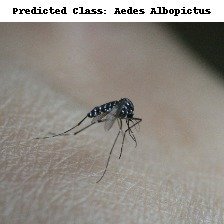

Predicted Class: Aedes Albopictus
1/1 [==============================] - 0s 28ms/step


<ipython-input-3-5206406c1fe7>:63: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


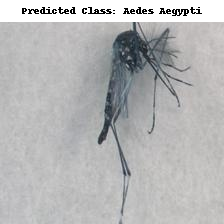

Predicted Class: Aedes Aegypti
1/1 [==============================] - 0s 27ms/step


<ipython-input-3-5206406c1fe7>:63: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


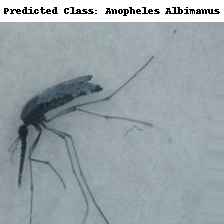

Predicted Class: Anopheles Albimanus
1/1 [==============================] - 0s 28ms/step


<ipython-input-3-5206406c1fe7>:63: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


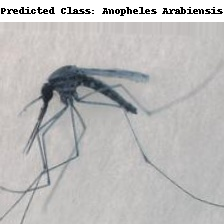

Predicted Class: Anopheles Arabiensis
1/1 [==============================] - 0s 27ms/step


<ipython-input-3-5206406c1fe7>:63: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


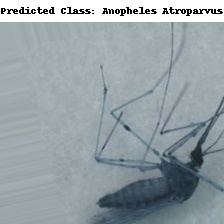

Predicted Class: Anopheles Atroparvus
1/1 [==============================] - 0s 28ms/step


<ipython-input-3-5206406c1fe7>:63: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


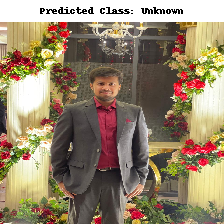

Predicted Class: Unknown
1/1 [==============================] - 0s 25ms/step


<ipython-input-3-5206406c1fe7>:63: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


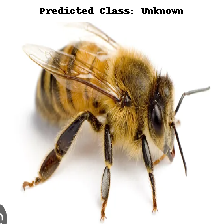

Predicted Class: Unknown
1/1 [==============================] - 0s 25ms/step


<ipython-input-3-5206406c1fe7>:63: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


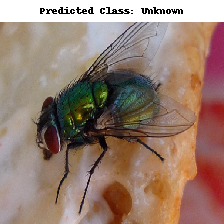

Predicted Class: Unknown
1/1 [==============================] - 0s 27ms/step


<ipython-input-3-5206406c1fe7>:63: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


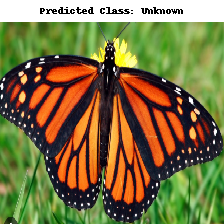

Predicted Class: Unknown
1/1 [==============================] - 0s 27ms/step


<ipython-input-3-5206406c1fe7>:63: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


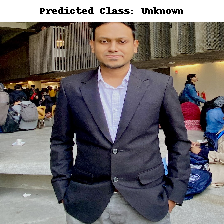

Predicted Class: Unknown
1/1 [==============================] - 0s 27ms/step


<ipython-input-3-5206406c1fe7>:63: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


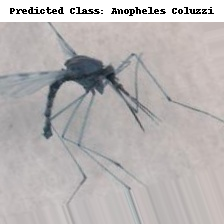

Predicted Class: Anopheles Coluzzi
1/1 [==============================] - 0s 27ms/step


<ipython-input-3-5206406c1fe7>:63: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


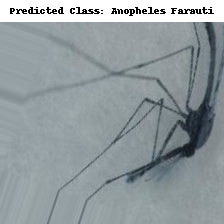

Predicted Class: Anopheles Farauti
1/1 [==============================] - 0s 24ms/step


<ipython-input-3-5206406c1fe7>:63: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


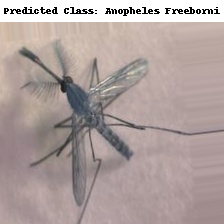

Predicted Class: Anopheles Freeborni
1/1 [==============================] - 0s 26ms/step


<ipython-input-3-5206406c1fe7>:63: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


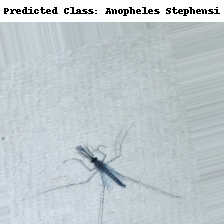

Predicted Class: Anopheles Stephensi
1/1 [==============================] - 0s 24ms/step


<ipython-input-3-5206406c1fe7>:63: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


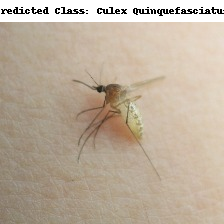

Predicted Class: Culex Quinquefasciatus


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from scipy.stats import weibull_min
from sklearn.metrics import euclidean_distances
import pickle
import ipywidgets as widgets
from IPython.display import display
from PIL import Image, ImageDraw, ImageFont

# Load your fine-tuned model
model_path = '/content/drive/MyDrive/mosquito_model3(Xception)'
model = load_model(model_path)

# Modify the model to output logits
logits_layer = model.layers[-2].output  # Adjust according to your model's architecture
logits_model = Model(inputs=model.input, outputs=logits_layer)

# Load MAVs and Weibull models
with open('/content/drive/MyDrive/mosquito_model3(Xception)/xception_mavs_and_weibull.pkl', 'rb') as f:
    mavs, weibull_models = pickle.load(f)

class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus', 'Anopheles Arabiensis',
               'Anopheles Atroparvus', 'Anopheles Coluzzi', 'Anopheles Farauti', 'Anopheles Freeborni',
               'Anopheles Stephensi', 'Culex Quinquefasciatus']
num_classes = len(class_names)

predicted_class = None  # Initialize predicted class as global variable

def classify_image(image_path):
    global predicted_class  # Declare predicted_class as global

    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch

    new_logits = logits_model.predict(img_array).flatten()

    # Calculate distances from MAVs and apply Weibull CDF
    recalibrated_scores = np.zeros(num_classes)
    for i in range(num_classes):
        dist = euclidean_distances([new_logits], [mavs[i]])[0][0]
        shape, loc, scale = weibull_models[i]
        weibull_cdf = weibull_min.cdf(dist, shape, loc, scale)
        recalibrated_scores[i] = 1 - weibull_cdf

    # Apply threshold to determine if the image is unknown or one of the known classes
    threshold = 0.1  # Define your threshold based on validation
    predicted_class_index = np.argmax(recalibrated_scores)
    if recalibrated_scores[predicted_class_index] < threshold:
        predicted_class = "Unknown"
    else:
        predicted_class = class_names[predicted_class_index]

    # Draw predicted class on the image
    draw = ImageDraw.Draw(img)
    font = ImageFont.load_default()

    # Add background rectangle
    text = f'Predicted Class: {predicted_class}'
    text_width, text_height = draw.textsize(text, font=font)
    img_width, img_height = img.size
    rect_width = text_width + 20
    rect_height = text_height + 10
    draw.rectangle([(0, 0), (img_width, rect_height)], fill='white')

    # Draw text
    draw.text(((img_width - text_width) // 2, 5), text, fill='black', font=font)

    # Display the image with the predicted class overlaid
    display(img)

# Widget to upload an image
uploader = widgets.FileUpload(
    accept='image/*',  # Accept only images
    multiple=False  # Allow single file upload
)

def on_upload_change(change):
    global predicted_class  # Access predicted_class globally
    if not uploader.value:
        return
    # Assuming one file only
    for _, file_info in uploader.value.items():
        content = file_info['content']
        with open("uploaded_image.png", "wb") as f:
            f.write(content)
        classify_image("uploaded_image.png")
        print("Predicted Class:", predicted_class)

uploader.observe(on_upload_change, names='value')
display(uploader)
